# Plotting DM spectra from PPPC4DMID

So, with can plot the spectra from the fits table created before:

In [1]:
%matplotlib inline
import gammalib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
jfactor = 1.7e+19
mass    = 5.0e+3
channel = 8
sigmav  = 3.0e-26

fluxnorm  = jfactor * sigmav / (8*gammalib.pi*mass**2)
fluxnorm *= 1.0e-3

In [3]:
dmtable = 'DMModelannaToyHaloEW1.fits'

dmspec = gammalib.GModelSpectralTable()
dmspec.load(dmtable)
dmspec['Channel'].scale(1)
dmspec['Mass'].value(mass)
dmspec['Normalization'].value(fluxnorm)

print(dmspec)

=== GModelSpectralTable ===
 Table file ................: DMModelannaToyHaloEW1.fits
 Number of parameters ......: 3
  Normalization ............: 8.11690209768666e-19 +/- 0 [0,1000]  (free,scale=1,gradient)
  Mass .....................: 5000 [100,100000]  (fixed,scale=100)
  Channel ..................: 8 [0,27]  (fixed,scale=1)
 Mass values ...............: 200 [100, 100000] (logarithmic)
 Channel values ............: 28 [0, 27] (linear)
 Energies ..................: 200 [30 GeV, 99.999997952 TeV]
 Spectra array dimension ...: 3
 Number of spectra .........: 5600
 Number of spectral bins ...: 200


<hr style="border:2px solid red"> </hr>

We set the energy range between $0.03~\text{TeV}$ and $50.0~\text{TeV}$, and compute the fluxes using the ```eval``` method from ```GModelSpectralTable```

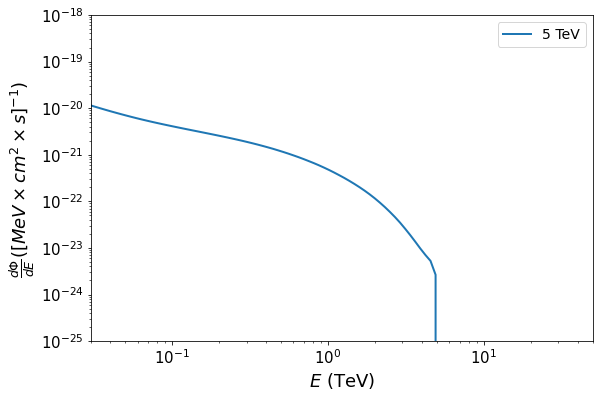

In [4]:
energies = np.logspace(np.log10(0.03), np.log10(50.0), 100)
fluxes   = [dmspec.eval(gammalib.GEnergy(e,'TeV')) for e in energies]

fig, ax  = plt.subplots( figsize=(9,6))

ax.set_xlim(0.03,50.0)
ax.set_ylim(1.e-25, 1.e-18)
ax.set_xlabel('$E$ (TeV)', fontsize=18)
ax.set_ylabel('$\\frac{d\\Phi}{dE} ([MeV\\times cm^2\\times s]^{-1})$ ', fontsize=18)

ax.set_xscale('log')
ax.set_yscale('log')

ax.tick_params(labelsize=15)

ax.plot(energies, fluxes, label='5 TeV', lw=2)

ax.legend(loc='best', prop={'size': 14})